# pands 예제 심화
- tutorial과 example을 풀어보았지만, 시각화 측면이나 pandas에서 중요하게 사용되는 merging 기능을 복습하는 차원에서 이 실습을 진행하였다. 

이 실습과 관련한 실습코드는 아래의 깃헙 사이트의 예제를 인용하였다.

https://github.com/guipsamora/pandas_exercises



## Merge

## MPG Cars

### Step 1. Import the necessary libraries

In [5]:
import pandas as pd
import numpy as np

### Step 2. Import the first dataset cars1 and cars2.

### Step 3. Assign each to a to a variable called cars1 and cars2

In [9]:
cars1 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv")
cars2 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv")

print(cars1.head())
print(cars2.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0  18.0          8           307        130    3504          12.0     70   
1  15.0          8           350        165    3693          11.5     70   
2  18.0          8           318        150    3436          11.0     70   
3  16.0          8           304        150    3433          12.0     70   
4  17.0          8           302        140    3449          10.5     70   

   origin                        car  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0       1  chevrolet chevelle malibu         NaN          NaN          NaN   
1       1          buick skylark 320         NaN          NaN          NaN   
2       1         plymouth satellite         NaN          NaN          NaN   
3       1              amc rebel sst         NaN          NaN          NaN   
4       1                ford torino         NaN          NaN          NaN   

   Unnamed: 12  Unnamed: 13  
0          NaN          NaN  
1          NaN

### Step 4. Oops, it seems our first dataset has some unnamed blank columns, fix cars1 --> 위에서 print 한거 보면 Unamed라는 불필요한게 있다 그거 지우자

In [10]:
cars1 = cars1.loc[:, "mpg":"car"] # loc 함수 사용하면 특정 컬럼 명을 사용해야한다.
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


### Step 5. What is the number of observations in each dataset?

In [11]:
# car1, car2에 나오는 행의 개수를 세보도록 하자
print(cars1.shape)
print(cars2.shape)

(198, 9)
(200, 9)


### Step 6. Join cars1 and cars2 into a single DataFrame called cars

In [12]:
cars = cars1.append(cars2) # 이 방법은 열의 개수가 동일 할 때 사용해야한다.
cars


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger


### Step 7. Oops, there is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [14]:
nr_owners = np.random.randint(15000, high=73001, size=398, dtype='l')
nr_owners

array([26555, 42000, 25552, 65265, 53310, 24278, 43750, 68319, 17008,
       44998, 56743, 53822, 24779, 32350, 18112, 38747, 16576, 35239,
       46711, 37784, 26695, 63296, 71511, 48882, 19361, 28790, 55978,
       16020, 48757, 63044, 54047, 59084, 57762, 68854, 20409, 49417,
       46921, 19333, 70460, 72165, 53860, 28930, 47388, 23688, 55070,
       53491, 37039, 42912, 35737, 63579, 61219, 40813, 30682, 49295,
       41316, 47507, 60897, 26593, 69143, 45301, 61513, 17121, 71720,
       48753, 25647, 34022, 23795, 63662, 64794, 20410, 64360, 18993,
       31466, 46158, 31189, 18367, 63834, 26912, 42990, 52120, 19266,
       49698, 72189, 51804, 41160, 31480, 24435, 15882, 55309, 26733,
       23320, 55280, 36621, 27226, 34657, 63201, 39286, 47581, 62341,
       44150, 52865, 45130, 16892, 29260, 42664, 50140, 48923, 19066,
       51552, 28201, 48846, 18304, 41089, 37732, 53647, 65415, 21017,
       48925, 68301, 27696, 33972, 42882, 54247, 49495, 56567, 16208,
       38041, 52055,

### Step 8. Add the column owners to cars

In [15]:
cars['owners'] = nr_owners
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,owners
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl,41455
196,44.0,4,97,52,2130,24.6,82,2,vw pickup,24937
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage,22826
198,28.0,4,120,79,2625,18.6,82,1,ford ranger,47661
199,31.0,4,119,82,2720,19.4,82,1,chevy s-10,45664


### Merging 기법!
- 이 예제에는 없지만 merge하는 가장 쉽고 많이 쓰는건 concat함수를 사용하는 것이다. 특히 이처럼 열이 모두 동일한 상황에 말이다.

In [19]:
pd.concat([cars1, cars2], axis = 0) # axis -= 0 을 해야 행에 추가할 수 있다. axis  = 1을 인자로 주면 열을 추가한다.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger


# Visualization

## Online Retails Purchase

### Introduction:

### Step 1. Import the necessary libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

### Step 2. Import the dataset from this address.

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set encoding = 'latin1' in pd.read_csv().

In [22]:
path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

# github에서 파일을 바로 다운받아서 사용하도록 하자.
online_rt = pd.read_csv(path, encoding = 'latin1')

online_rt.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

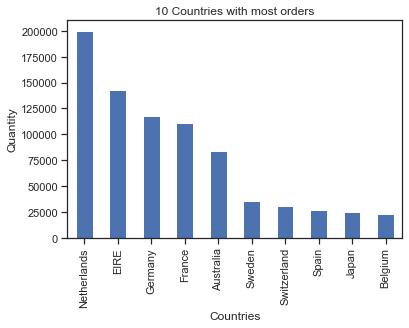

In [23]:
# group by the Country
countries = online_rt.groupby('Country').sum()

# sort the value and get the first 10 after UK
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]

# create the plot
countries['Quantity'].plot(kind='bar') # bar plot으로 표현하기 위해 이 줄이 반드시 필요하다.

# Set the title and labels
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

# show the plot
plt.show()

### Step 5. Exclude negative Quantity entries

In [24]:
online_rt = online_rt[online_rt.Quantity > 0] # 0보다 작은거만 쓰드록 한다.
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

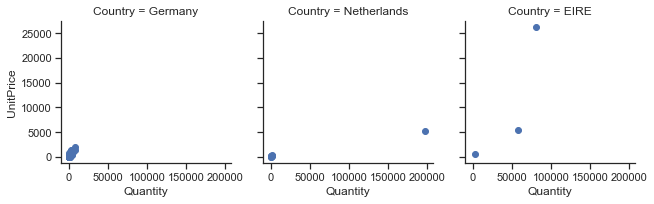

In [25]:
# groupby CustomerID
customers = online_rt.groupby(['CustomerID','Country']).sum()

# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]

# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany'] # top3 국가 추출

# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)] # 3개 그래프 그리기 위해 사용할 값 준비

#################
# Graph Section #
#################

# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country") # FacetGrid 사용해 세 개 그래프를 그린다.

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()

# 산점도로 표현하려고 한다. 국가별로 양 별 가격을 산점도로 표현한다.

### Step 7. Investigate why the previous results look so uninformative.
This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.

##### Step 7.1.1 Display the first few rows of that DataFrame.

In [26]:
#This takes our initial dataframe groups it primarily by 'CustomerID' and secondarily by 'Country'.
#It sums all the (non-indexical) columns that have numerical values under each group.
customers = online_rt.groupby(['CustomerID','Country']).sum().head()

#Here's what it looks like:
customers

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


##### Step 7.1.2 Think about what that piece of code does and display the dtype of UnitPrice

In [28]:
customers.UnitPrice.dtype
#So it's 'float64'
#But why did we sum 'UnitPrice', to begin with?
#If 'UnitPrice' wasn't something that we were interested in then it would be OK
#since we wouldn't care whether UnitPrice was being summed or not.
#But we want our graphs to reflect 'UnitPrice'!
#Note that summing up 'UnitPrice' can be highly misleading.
#It doesn't tell us much as to what the customer is doing.
#Suppose, a customer places one order of 1000 items that are worth $1 each.
#Another customer places a thousand orders of 1 item worth $1.
#There isn't much of a difference between what the former and the latter customers did.
#After all, they've spent the same amount of money.
#so we should be careful when we're summing columns. Sometimes we intend to sum just one column
#('Quantity' in this case) and another column like UnitPrice gets ito the mix.

# dtype은 tutorial 부분에서 했던 것과 같이 메모리 사용량에 있어서 매우 중요하다.

dtype('float64')

##### Step 7.1.3 Pull data from online_rtfor CustomerIDs 12346.0 and 12347.0.

In [31]:
display(online_rt[online_rt.CustomerID == 12347.0].
        sort_values(by='UnitPrice', ascending = False).head()) # CustomerID는 12347.0이고 UnitPrice 기준으로 내림차순 정렬한다.
display(online_rt[online_rt.CustomerID == 12346.0].
        sort_values(by='UnitPrice', ascending = False).head())  # CustomerID는 12346.0이고 UnitPrice 기준으로 내림차순 정렬한다.
#The result is exactly what we'd suspected. Customer 12346.0 placed
#one giant order, whereas 12347.0 placed a lot of smaller orders.
#So we've identified one potential reason why our plots looked so weird at section 6.
#At this stage we need to go back to the initial problem we've specified at section 6.
#And make it more precise.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
428967,573511,23173,REGENCY TEAPOT ROSES,2,10/31/11 12:25,9.95,12347.0,Iceland


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


#### Step 7.2 Reinterpreting the initial problem.
To reiterate the question that we were dealing with:
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations. We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries. Or we could do one plot per country. To keep things consistent with the rest of the exercise, let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves: Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue). This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [33]:
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False) # 우선 내림차순 정렬해놓고

top3 = sales_volume.index[1:4] #We are excluding UK # 1 : 4 --> 상위 3개 추출
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

#### Step 7.2.2
Now that we have the top 3 countries, we can focus on the rest of the problem:
"Quantity per UnitPrice by CustomerID".
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:
One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total Quantity for each customer. The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called Revenue calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [34]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice # 새로운 열을 만든다. 기존의 열 두 개의 곱으로 구성된다.
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


##### Step 7.3.2 Group by CustomerID and Country and find out the average price (AvgPrice) each customer spends per unit.

In [35]:
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country']) # 두 개를 기준으로 정렬

plottable = grouped['Quantity','Revenue'].agg('sum') # aggregating with sum
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity # 위에 만든 변수를 가지고 새로운 열 만들기.

# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

<ipython-input-35-167a97b7d2e3>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum') # aggregating with sum


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


##### Step 7.3.3 Plot

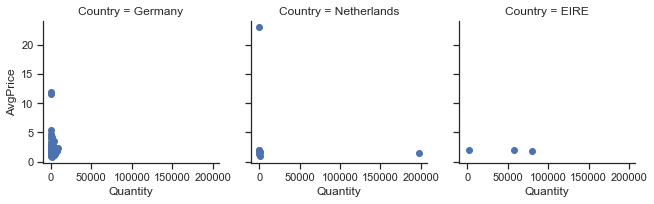

In [36]:
####################
# Graph Section v 2#
####################

# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country") # 아까 위에서 한 것과 동일

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)

# adds legend
g.add_legend();

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair! There are two things to realize: 1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend. 2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of Country and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each CustomerID on a single graph

<ipython-input-37-805e0c19acfb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


[]

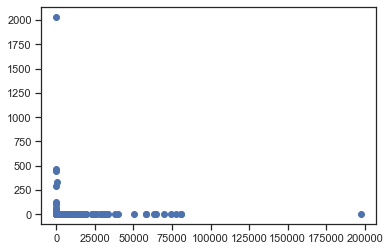

In [37]:

grouped = online_rt.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice) # 이번에는 CutomerID 별로 표현하겠다.
plt.plot()


#Turns out the graph is still extremely skewed towards the axes like an exponential decay function.

##### Step 7.4.2 Zoom in so we can see that curve more clearly

[]

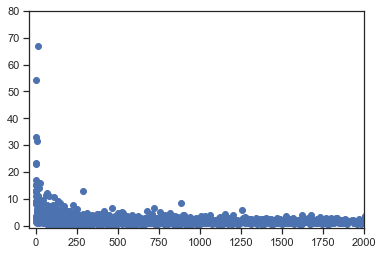

In [39]:
grouped = online_rt.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum',
                         'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)

#Zooming in. (I'm starting the axes from a negative value so that
#the dots can be plotted in the graph completely.)
plt.xlim(-40,2000)  # X 축과 Y 축의 범위를 조정하여 더 보기 산점 정도를 육안으로 보기 쉽게 하였다.
plt.ylim(-1,80)

plt.plot()


#And there is still that pattern, this time in close-up!

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).
Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses. But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.


#### 8.1 Group UnitPrice by intervals of 1 for prices [0,50), and sum Quantity and Revenue.

In [40]:
#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0 
price_end = 50
price_interval = 1

#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)

#Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1.107775e+06
(1, 2]    2.691765e+06
(2, 3]    2.024143e+06
(3, 4]    8.651018e+05
(4, 5]    1.219377e+06
Name: Revenue, dtype: float64

#### 8.2 Plot.

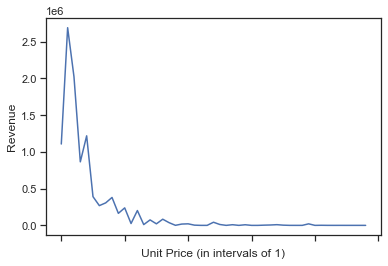

In [41]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()